## Contoh Implementasi FIR

Berikut merupakan contoh implementasi FIR dengan proses smoothing, dimana adalah $w = [\frac{1}{3} \frac{1}{3} \frac{1}{3}]$. Kita akan menggunakan sinyal kombinasi 5Hz dan 10Hz sebagai sinyal noise yang akan filter

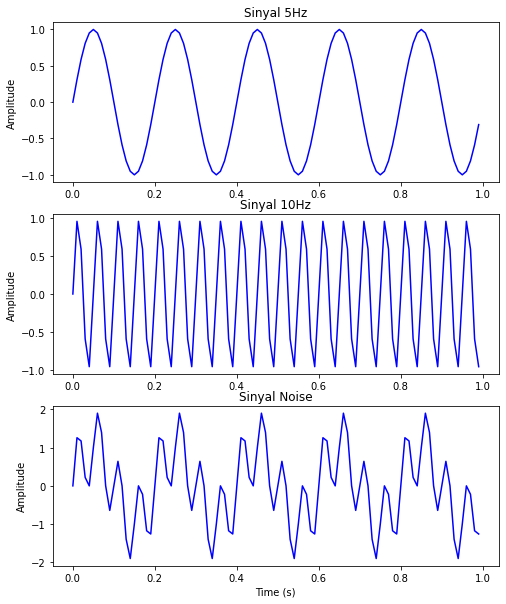

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# sampling rate
sr = 100.0
# sampling interval
ts = 1.0/sr
# durasi
t = np.arange(0,1,ts)

# sinyal 5Hz
freq = 5   
x = np.sin(2*np.pi*freq*t)

# sinyal 20Hz
freq2 = 20   
x2 = np.sin(2*np.pi*freq2*t)

# sinyal noise --> 5Hz + 20Hz
x3 = x + x2

# plot gambar
plt.figure(figsize = (8, 10))

plt.subplot(311, title='Sinyal 5Hz')
plt.plot(t, x, 'b')
plt.ylabel('Amplitude')

plt.subplot(312, title='Sinyal 10Hz')
plt.plot(t, x2, 'b')
plt.ylabel('Amplitude')

plt.subplot(313, title='Sinyal Noise')
plt.plot(t, x3, 'b')
plt.ylabel('Amplitude')

plt.xlabel('Time (s)')
plt.show()

### Desain Filter

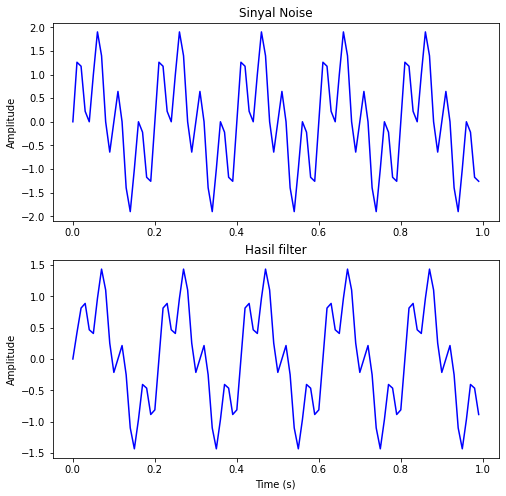

In [75]:
# import numpy as np
from scipy import signal
w = np.ones(3)/3 # bobot w / nilai filter

# Filter sinyal
y_filter = signal.lfilter(w, 1, x3)


# plot gambar
plt.figure(figsize=(8,8))

plt.subplot(211, title='Sinyal Noise')
plt.plot(t, x3, 'b')
plt.ylabel('Amplitude')

plt.subplot(212, title='Hasil Filter')
plt.plot(t, y_filter, 'b')
plt.ylabel('Amplitude')


plt.xlabel('Time (s)')
plt.title('Hasil filter')
plt.show()

## Contoh Implementasi IIR

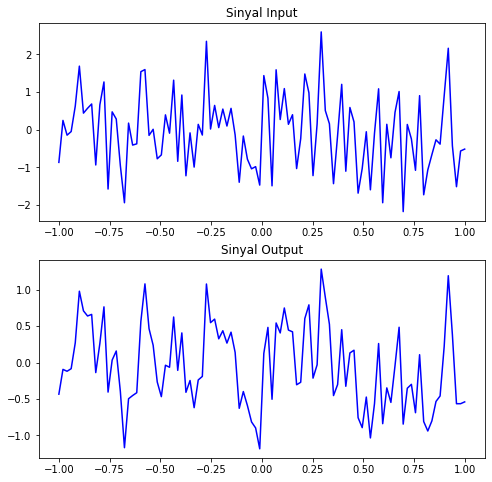

In [58]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

# Dummy input_data and parameter
x = np.random.randn(100) # this will generate random value
alpha = 0.5

# IIR filter coefficients for exponential averaging filter
a = [1, -(1-alpha)]
b = [alpha]

# Apply the filter
y = signal.lfilter(b,a,x)

# Plot
t = np.linspace(-1, 1, 100)
plt.figure(figsize=(8,8))

plt.subplot(211, title="Sinyal Input")
plt.plot(t, x, 'b')

plt.subplot(212, title="Sinyal Output")
plt.plot(t, y, 'b')

plt.show()

### Desain Filter dengan Butterworth

Contoh lain kita akan menggunakan butterworth LPF yang merupakan filter IIR. Sinyal yaitu sinyal noise 5Hz + 20Hz

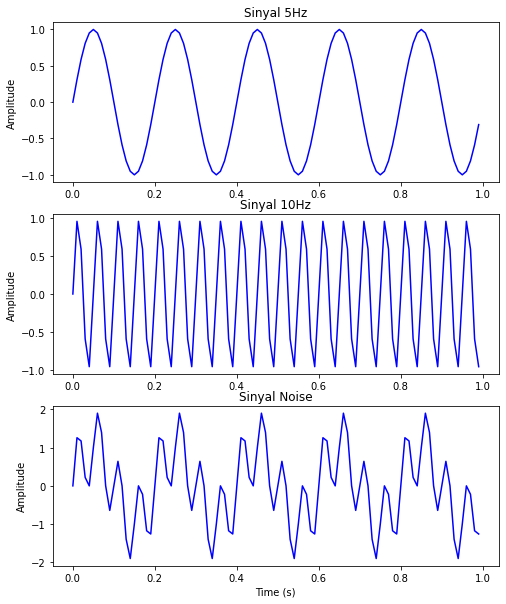

In [59]:
import numpy as np
import matplotlib.pyplot as plt

# sampling rate
sr = 100.0
# sampling interval
ts = 1.0/sr
# durasi
t = np.arange(0,1,ts)

# sinyal 5Hz
freq = 5   
xi = np.sin(2*np.pi*freq*t)

# sinyal 20Hz
freq2 = 20   
xi2 = np.sin(2*np.pi*freq2*t)

# sinyal noise --> 5Hz + 20Hz
xi3 = xi + xi2

# plot gambar
plt.figure(figsize = (8, 10))

plt.subplot(311, title='Sinyal 5Hz')
plt.plot(t, xi, 'b')
plt.ylabel('Amplitude')

plt.subplot(312, title='Sinyal 10Hz')
plt.plot(t, xi2, 'b')
plt.ylabel('Amplitude')

plt.subplot(313, title='Sinyal Noise')
plt.plot(t, xi3, 'b')
plt.ylabel('Amplitude')

plt.xlabel('Time (s)')
plt.show()

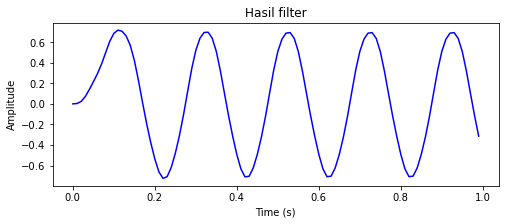

In [87]:
# Lowpass Filter dengan Buttworth orde 3

from scipy import signal
bi, ai = signal.butter(3, 5, fs=100) # di return dalam bentuk polynomial

yi_butfilt = signal.lfilter(bi, ai, xi3)

plt.figure(figsize=(8,3))
plt.plot(t, yi_butfilt, 'b')
plt.ylabel('Amplitude')
plt.xlabel('Time (s)')
plt.title('Hasil filter')
plt.show()

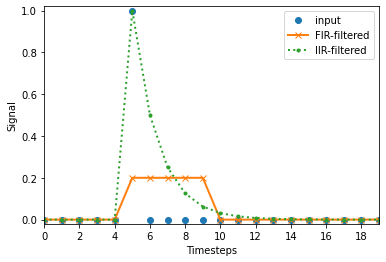

In [76]:
""" Show the effect of an FIR- and an IIR-filter on an impulse """
# Import the standard packages
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
# Generate the impulse and the time-axis
xx = np.zeros(20)
xx[5] = 1
tt = np.arange(20)
# Put the results into a Python-dictionary
data = {}
data['before'] = xx
data['after_fir'] = signal.lfilter(np.ones(5)/5, 1, xx)
data['after_iir'] = signal.lfilter([1], [1, -0.5], xx)
# Show the results
plt.plot(tt, data['before'], 'o', label='input', lw=2)
plt.plot(tt, data['after_fir'], 'x-', label='FIR-filtered', lw=2)
plt.plot(tt, data['after_iir'], '.:', label='IIR-filtered', lw=2)
# Format the plot
plt.xlabel('Timesteps')
plt.ylabel('Signal')
plt.legend()
plt.xticks(np.arange(0, 20, 2))
plt.gca().margins(x=0, y=0.02)
# Save and show the image
plt.show()